In [1]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
np.random.seed(1)

In [8]:
u = 3.5 
s = 1.5 

samples = 1000
sample_data = np.random.logistic(loc=u, scale=s, size=samples)

In [9]:
def logistic_like_hood(params):
    loc = params[0]
    s = params[1]
    
    nll = -np.sum(stats.logistic.logpdf(sample_data, loc=loc, scale=s))
    
    return nll

location* = 3.666 scale* = 1.529
location  = 3.500 scale  = 1.500


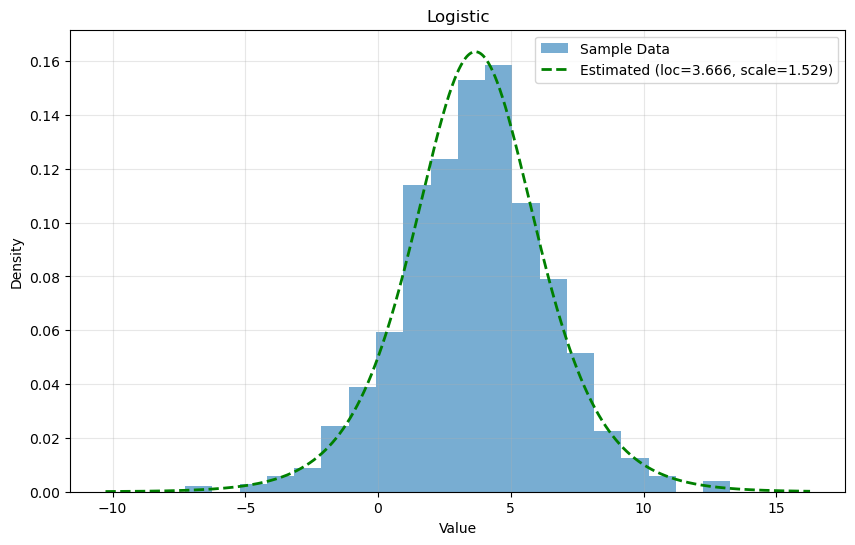

In [10]:
initParams = [0, 1]

results = minimize(logistic_like_hood, initParams, method='Nelder-Mead')

print('location* = {:.3f} scale* = {:.3f}'.format(results.x[0], results.x[1]))
print('location  = {:.3f} scale  = {:.3f}'.format(u, s))

plt.figure(figsize=(10, 6))

plt.hist(sample_data, bins=20, density=True, alpha=0.6, label='Sample Data')

x = np.linspace(min(sample_data)-3, max(sample_data)+3, 1000)

estimated_pdf = stats.logistic.pdf(x, loc=results.x[0], scale=results.x[1])
plt.plot(x, estimated_pdf, 'g--', linewidth=2, label=f'Estimated (loc={results.x[0]:.3f}, scale={results.x[1]:.3f})')

plt.title('Logistic')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()